In [1]:
from scipy.io import loadmat
from os import listdir
from os.path import isfile, join
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

In [3]:
VIDEO_FRAMES_PATH_ONSHORE = "train/"
VIDEO_FRAMES_PATH_ONBOARD = "train/"
VIDEO_FRAMES_PATH_NIR = "train/"

# Example plot of bounding box

In [6]:
# try to draw image with bounding boxes
# load the object ground truth files first

video_name = 'MVI_1613_VIS'
objects_onshore = []
with open("objects_onshore.txt") as f:
    for line in f: 
        line = line.strip()
        objects_onshore.append(line)
        
objects_onboard = []
with open("objects_onboard.txt") as f:
    for line in f: 
        line = line.strip()
        objects_onboard.append(line)
        
objects_nir = []
with open("objects_nir.txt") as f:
    for line in f: 
        line = line.strip()
        objects_nir.append(line)

In [8]:
print(objects_nir[0])

MVI_1532_NIR_frame0.jpg,2.9468988954970143,502.16525063721315,182.70178419711132,40.78164825828378,3,2,1


In [9]:
# get relevant frame information for previous video
# and for frame 0
frame = '0'
relevant_objects = [i for i in objects_onshore if i.startswith(video_name + '_frame' + frame)]

In [10]:
len(relevant_objects)

10

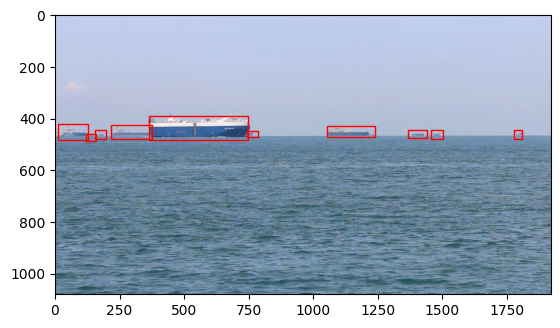

In [11]:
# draw bounding boxes for the image
im = np.array(Image.open(VIDEO_FRAMES_PATH_ONSHORE + video_name + "_frame" + frame +".jpg"), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# for every object in frame crate a rectangle patch
for entry in relevant_objects:
    data = entry.split(',')

    # Create a Rectangle patch
    rect = patches.Rectangle((float(data[1]),float(data[2])),float(data[3]),float(data[4]),linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()